# Project - German Bank Loan

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("credit.csv")
df.head(10)


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [5]:
df_preprocessed = pd.read_csv("preprocessed_credit.csv")
df_preprocessed.head(10)


,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,...,other_credit_store,housing_own,housing_rent,job_management,job_skilled,job_unskilled,credit_history,employment_duration,phone,default
0,6,1169,4,4,67,2,1,0,1,0,...,0,1,0,0,1,0,0.0,4.0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,1,0,0,1,0,2.0,2.0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,0,1,0,0,0,1,0.0,3.0,0,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,0,0,1,0,2.0,3.0,0,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,0,1,0,1.0,2.0,0,1
5,36,9055,2,4,35,1,2,0,0,0,...,0,0,0,0,0,1,2.0,2.0,1,0
6,24,2835,3,4,53,1,1,0,0,0,...,0,1,0,0,1,0,2.0,4.0,0,0
7,36,6948,2,2,35,1,1,1,0,0,...,0,0,1,1,0,0,2.0,2.0,1,0
8,12,3059,2,4,61,1,1,0,0,0,...,0,1,0,0,0,1,2.0,3.0,0,0
9,30,5234,4,2,28,2,1,1,0,0,...,0,1,0,1,0,0,0.0,0.0,0,1


### Standardisation and splitting data to train and test set.

In [7]:
!pip install xgboost


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [9]:

X = df_preprocessed.drop(columns=['default'])
y = df_preprocessed['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Models to be tested. 
1. Logistic Regression
2. LDA
3. QDA
4. Naive Bayes
5. KNN
6. SVM
7. Random Forest
8. Gradient Boosting Machines (GBM)
9. AdaBoost
10. XGBoost
11. LightGBM
12. Catboost

We may use voting classifer too. 

#### 1. LogisticRegression Model

Logistic Regression - Training Set Performance
Training Accuracy: 0.76875
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       560
           1       0.66      0.47      0.55       240

    accuracy                           0.77       800
   macro avg       0.73      0.68      0.70       800
weighted avg       0.76      0.77      0.76       800



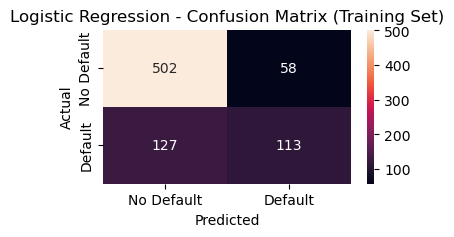

Logistic Regression - Test Set Performance
Test Accuracy: 0.755
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       140
           1       0.61      0.50      0.55        60

    accuracy                           0.76       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.74      0.76      0.75       200



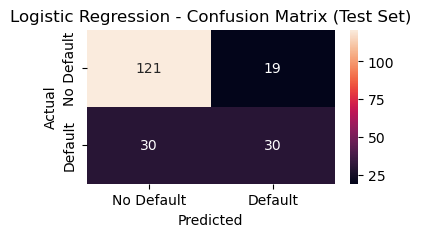

In [12]:
models = {}
defaulter_count = np.sum(y_train)
total_count = len(y_train)
defaulter_weight = defaulter_count/total_count
# class_weight={0: defaulter_count, 1: total_count-defaulter_count}
class_weight={0: 1, 1: 1}

logistic_model = LogisticRegression(class_weight=class_weight, random_state=42) 
logistic_model.fit(X_train_scaled, y_train)
model_name = "Logistic Regression"
models[model_name] = logistic_model
def get_classification_report(model, X, y, model_name="Logistic Regression", data_label="Training"):
    print(f"{model_name} - {data_label} Set Performance")
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"{data_label} Accuracy: {accuracy}")
    print(classification_report(y, y_pred))
    conf = confusion_matrix(y, y_pred)
    plt.figure(figsize=(4, 2))
    sns.heatmap(conf, annot=True, fmt='d',
                xticklabels=['No Default', 'Default'],
                yticklabels=['No Default', 'Default'])
    plt.title(f'{model_name} - Confusion Matrix ({data_label} Set)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


get_classification_report(logistic_model, X_train_scaled, y_train, model_name=model_name, data_label="Training")
get_classification_report(logistic_model, X_test_scaled, y_test, model_name=model_name, data_label="Test")

#### 2. Linear Discriminant Analysis

The coefficients are  {'months_loan_duration': 0.38763789331933185, 'amount': 0.23664033553123354, 'percent_of_income': 0.3345350531030353, 'years_at_residence': 0.011917164546244398, 'age': 0.01850250866486133, 'existing_loans_count': 0.1057075280323715, 'dependents': 0.02188918312516222, 'checking_balance_1 - 200 DM': 0.49732603055386115, 'checking_balance_< 0 DM': 0.720083831863462, 'checking_balance_> 200 DM': 0.19820170087286543, 'purpose_business': -0.20252406831318143, 'purpose_car': -0.22703634764793837, 'purpose_education': 0.11999153381662542, 'purpose_furniture/appliances': -0.3384976157169964, 'savings_balance_100 - 500 DM': 0.24349078612134467, 'savings_balance_500 - 1000 DM': 0.08861645057251245, 'savings_balance_< 100 DM': 0.46462608917962955, 'savings_balance_> 1000 DM': -0.0030552684599530703, 'other_credit_bank': 0.2880587452611497, 'other_credit_store': 0.05940624182226663, 'housing_own': -0.038443628730767135, 'housing_rent': 0.2288607930691368, 'job_management': 0.

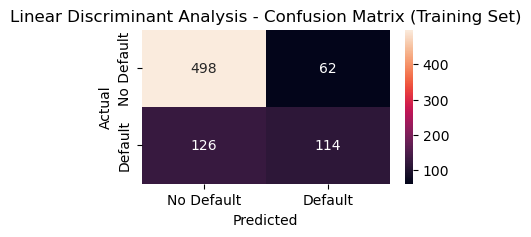

Linear Discriminant Analysis - Test Set Performance
Test Accuracy: 0.755
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       140
           1       0.61      0.50      0.55        60

    accuracy                           0.76       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.74      0.76      0.75       200



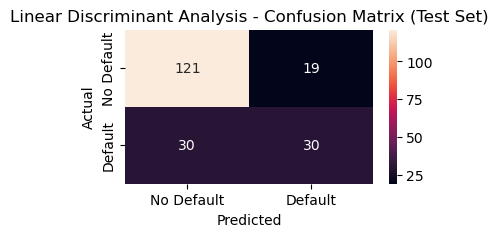

In [14]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)
print("The coefficients are ", {column: value for column, value in zip(X_train.columns, lda_model.coef_[0])})
model_name = "Linear Discriminant Analysis"
models[model_name] = lda_model
get_classification_report(lda_model, X_train_scaled, y_train, model_name=model_name, data_label="Training")
get_classification_report(lda_model, X_test_scaled, y_test, model_name=model_name, data_label="Test")


#### 3. Quadratic Discriminant Analysis

Quadratic Discriminant Analysis - Training Set Performance
Training Accuracy: 0.8025
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       560
           1       0.65      0.73      0.69       240

    accuracy                           0.80       800
   macro avg       0.77      0.78      0.77       800
weighted avg       0.81      0.80      0.81       800



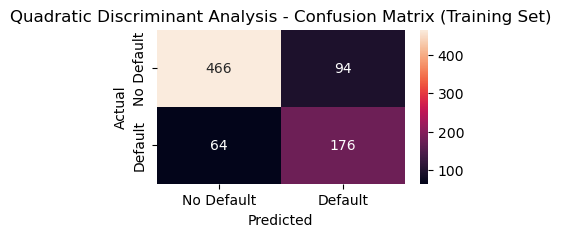

Quadratic Discriminant Analysis - Test Set Performance
Test Accuracy: 0.695
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       140
           1       0.49      0.60      0.54        60

    accuracy                           0.69       200
   macro avg       0.65      0.67      0.66       200
weighted avg       0.72      0.69      0.70       200



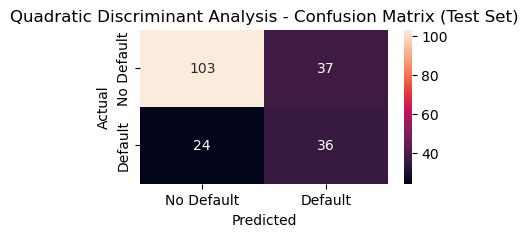

In [16]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_scaled, y_train)
model_name = "Quadratic Discriminant Analysis"
models[model_name] = qda_model
get_classification_report(qda_model, X_train_scaled, y_train, model_name=model_name, data_label="Training")
get_classification_report(qda_model, X_test_scaled, y_test, model_name=model_name, data_label="Test")


#### 4. Gaussian Naive Bayes

Gaussian Naive Bayes - Training Set Performance
Training Accuracy: 0.70125
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       560
           1       0.50      0.63      0.56       240

    accuracy                           0.70       800
   macro avg       0.66      0.68      0.67       800
weighted avg       0.73      0.70      0.71       800



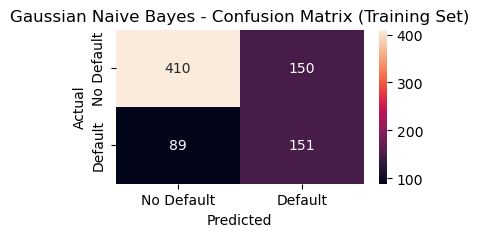

Gaussian Naive Bayes - Test Set Performance
Test Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       140
           1       0.49      0.67      0.56        60

    accuracy                           0.69       200
   macro avg       0.66      0.68      0.66       200
weighted avg       0.73      0.69      0.70       200



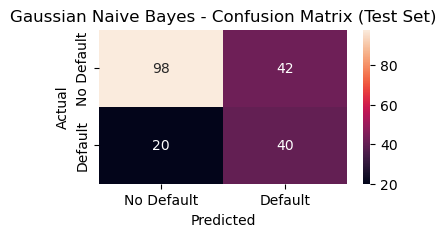

In [18]:
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
model_name = "Gaussian Naive Bayes"
models[model_name] = gnb_model
get_classification_report(gnb_model, X_train_scaled, y_train, model_name=model_name, data_label="Training")
get_classification_report(gnb_model, X_test_scaled, y_test, model_name=model_name, data_label="Test")


#### 5. K-Nearest Neighbors (KNN) 

The best parameter is {'n_neighbors': 3}
K-Nearest Neighbors (KNN) - Training Set Performance
Training Accuracy: 0.84125
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       560
           1       0.81      0.61      0.70       240

    accuracy                           0.84       800
   macro avg       0.83      0.78      0.80       800
weighted avg       0.84      0.84      0.83       800



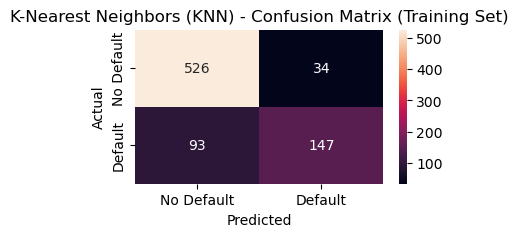

K-Nearest Neighbors (KNN) - Test Set Performance
Test Accuracy: 0.685
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       140
           1       0.47      0.35      0.40        60

    accuracy                           0.69       200
   macro avg       0.61      0.59      0.59       200
weighted avg       0.66      0.69      0.67       200



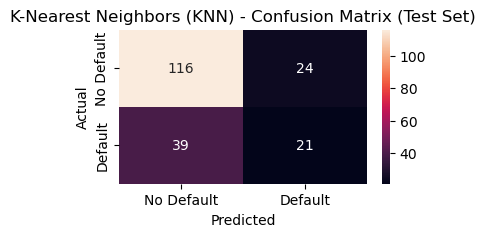

In [20]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(3, 15),
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, refit=True)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f"The best parameter is {best_params}")
knn_model = grid_search.best_estimator_
model_name = "K-Nearest Neighbors (KNN)"
models[model_name] = knn_model
get_classification_report(knn_model, X_train_scaled, y_train, model_name=model_name, data_label="Training")
get_classification_report(knn_model, X_test_scaled, y_test, model_name=model_name, data_label="Test")


#### 6. Support Vector Machine (SVM)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.4666666666666666
Support Vector Machine (SVM) - Training Set Performance
Training Accuracy: 0.96875
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       560
           1       0.98      0.92      0.95       240

    accuracy                           0.97       800
   macro avg       0.97      0.95      0.96       800
weighted avg       0.97      0.97      0.97       800



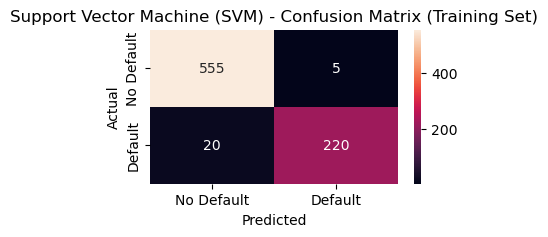

Support Vector Machine (SVM) - Test Set Performance
Test Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       140
           1       0.57      0.52      0.54        60

    accuracy                           0.74       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.73      0.74      0.74       200



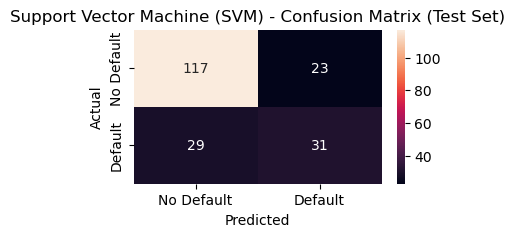

In [22]:
param_grid = {
    'C': [1, 5, 10, 15, 20, 25],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm = SVC(class_weight=class_weight, random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, scoring='recall', refit=True)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
svm_model = grid_search.best_estimator_
# print("Class weight:", svm_model.class_weight_)
model_name = "Support Vector Machine (SVM)"
models[model_name] = svm_model
get_classification_report(svm_model, X_train_scaled, y_train, model_name=model_name, data_label="Training")
get_classification_report(svm_model, X_test_scaled, y_test, model_name=model_name, data_label="Test")


#### 7. Random Forest Classifier

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.38333333333333336
Random Forest Classifier - Training Set Performance
Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00       240

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



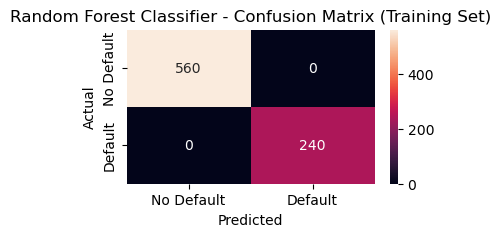

Random Forest Classifier - Test Set Performance
Test Accuracy: 0.745
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       140
           1       0.64      0.35      0.45        60

    accuracy                           0.74       200
   macro avg       0.70      0.63      0.64       200
weighted avg       0.73      0.74      0.72       200



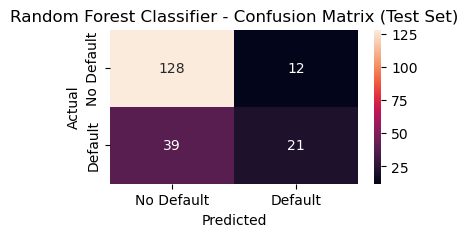

In [24]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 20, 25],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring = 'recall', refit=True)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
rf_model = grid_search.best_estimator_
model_name = "Random Forest Classifier"
models[model_name] = rf_model
get_classification_report(rf_model, X_train_scaled, y_train, model_name=model_name, data_label="Training")
get_classification_report(rf_model, X_test_scaled, y_test, model_name=model_name, data_label="Test")


#### 8. Gradient Boosting Machines (GBM)

Best Parameters: {'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 11}
Best Score: 0.45833333333333337
Gradient Boosting Classifier - Training Set Performance
Training Accuracy: 0.97625
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       560
           1       0.99      0.93      0.96       240

    accuracy                           0.98       800
   macro avg       0.98      0.96      0.97       800
weighted avg       0.98      0.98      0.98       800



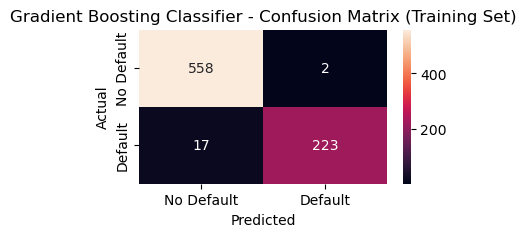

Gradient Boosting Classifier - Test Set Performance
Test Accuracy: 0.765
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       140
           1       0.63      0.52      0.57        60

    accuracy                           0.77       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200



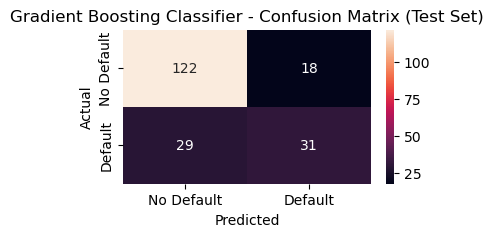

In [26]:
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'max_features': [5, 6, 7, 8],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [9, 10, 11, 12]
}
gb_clf = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, n_jobs=-1, scoring = 'recall', refit=True)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
gbm_model = grid_search.best_estimator_
model_name = "Gradient Boosting Classifier"
models[model_name] = gbm_model
get_classification_report(gbm_model, X_train_scaled, y_train, model_name=model_name, data_label="Training")
get_classification_report(gbm_model, X_test_scaled, y_test, model_name=model_name, data_label="Test")


#### 9. AdaBoost

Best Parameters: {'learning_rate': 2.0, 'n_estimators': 40}
Best Score: 0.7875000000000001
AdaBoost Classifier - Training Set Performance
Training Accuracy: 0.63125
              precision    recall  f1-score   support

           0       0.86      0.56      0.68       560
           1       0.44      0.79      0.56       240

    accuracy                           0.63       800
   macro avg       0.65      0.68      0.62       800
weighted avg       0.73      0.63      0.65       800



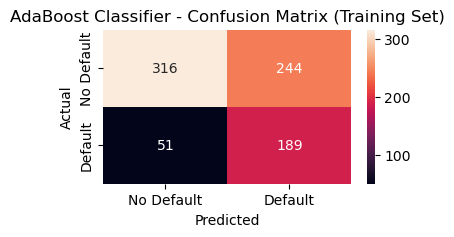

AdaBoost Classifier - Test Set Performance
Test Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.90      0.58      0.70       140
           1       0.46      0.85      0.60        60

    accuracy                           0.66       200
   macro avg       0.68      0.71      0.65       200
weighted avg       0.77      0.66      0.67       200



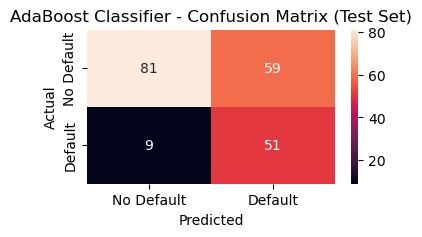

In [28]:
param_grid = {
    'n_estimators': [35, 40, 45, 50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]
}
ada_clf = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(ada_clf, param_grid, cv=5, n_jobs=-1, scoring = 'recall', refit=True)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
adaboost_model = grid_search.best_estimator_
model_name = "AdaBoost Classifier"
models[model_name] = adaboost_model
get_classification_report(adaboost_model, X_train_scaled, y_train, model_name=model_name, data_label="Training")
get_classification_report(adaboost_model, X_test_scaled, y_test, model_name=model_name, data_label="Test")


#### 10. XGBoost

Best Parameters: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 228, 'reg_alpha': 0.01, 'subsample': 0.9}
Best Score: 0.5166666666666667
XGBoost Classifier - Training Set Performance
Training Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       560
           1       1.00      0.97      0.98       240

    accuracy                           0.99       800
   macro avg       0.99      0.98      0.99       800
weighted avg       0.99      0.99      0.99       800



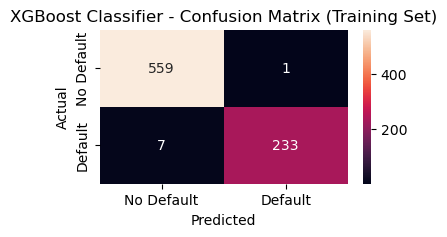

XGBoost Classifier - Test Set Performance
Test Accuracy: 0.705
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       140
           1       0.51      0.45      0.48        60

    accuracy                           0.70       200
   macro avg       0.64      0.63      0.64       200
weighted avg       0.70      0.70      0.70       200



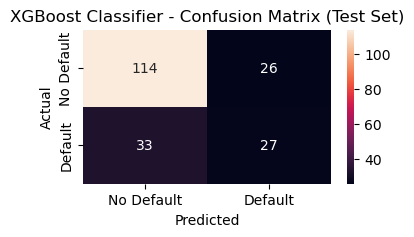

In [30]:
xgboost_model = XGBClassifier(objective= 'binary:logistic', seed=42, scale_pos_weight=1)
parameters = {
    'n_estimators':range(227, 230),
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [3, 4, 5],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'reg_alpha': [0, 0.01, 0.02]
}
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=parameters, cv=5, scoring='recall', n_jobs=-1, refit=True)
grid_search.fit(X_train_scaled, y_train)  
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
xgboost_model = grid_search.best_estimator_
model_name = "XGBoost Classifier"
models[model_name] = xgboost_model
get_classification_report(xgboost_model, X_train_scaled, y_train, model_name=model_name, data_label="Training")
get_classification_report(xgboost_model, X_test_scaled, y_test, model_name=model_name, data_label="Test")


#### 11. LightGBM

[LightGBM] [Info] Number of positive: 192, number of negative: 448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300000 -> initscore=-0.847298
[LightGBM] [Info] Start training from score -0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

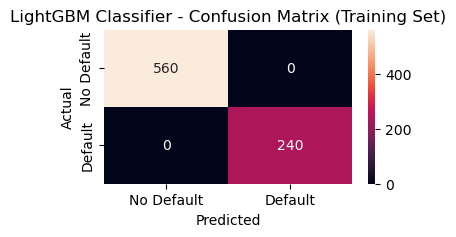

LightGBM Classifier - Test Set Performance
Test Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       140
           1       0.50      0.47      0.48        60

    accuracy                           0.70       200
   macro avg       0.64      0.63      0.64       200
weighted avg       0.69      0.70      0.70       200



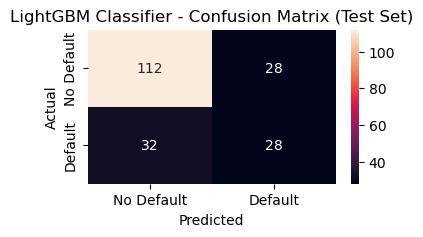

In [32]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(objective='binary', random_state=42, n_jobs=-1)
parameters = {
    'n_estimators': [100, 150],
    'num_leaves': [23, 24],
    'learning_rate': [0.2, 0.3],
    # 'min_child_weight': [1, 3, 5],
    'max_depth': [5, 6],
    # 'min_child_samples': [10, 20, 30],
    # 'subsample': [0.5, 0.7, 1],
    # 'colsample_bytree': [0.5, 0.7, 1],
    'reg_alpha': [0.1, 0.2]
}
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='recall', n_jobs=-1, refit=True)
grid_search.fit(X_train_scaled, y_train)  
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
lightgbm_model = grid_search.best_estimator_
model_name = "LightGBM Classifier"
models[model_name] = lightgbm_model
get_classification_report(lightgbm_model, X_train_scaled, y_train, model_name=model_name, data_label="Training")
get_classification_report(lightgbm_model, X_test_scaled, y_test, model_name=model_name, data_label="Test")


#### 12. Catboost

In [34]:
!pip install catboost


2.3333333333333335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

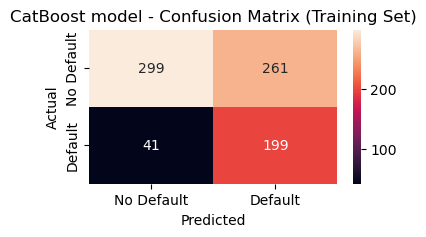

CatBoost model - Test Set Performance
Test Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.89      0.54      0.67       140
           1       0.44      0.85      0.58        60

    accuracy                           0.63       200
   macro avg       0.67      0.69      0.62       200
weighted avg       0.76      0.63      0.64       200



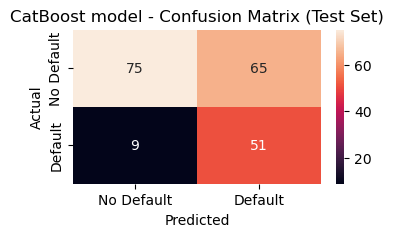

In [35]:
from catboost import CatBoostClassifier, Pool
X = df.drop(columns=['default'])
y = df['default']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

categorical_features = ["checking_balance", "credit_history", "purpose", "savings_balance", "employment_duration", "other_credit", "housing", "job", "phone"]
parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 5, 6],
    'l2_leaf_reg': [5, 6, 7],
    'border_count': [128, 150, 175],
    'iterations': [25, 50, 75]
}
scale_pos_weight = len(y_train_c[y_train_c=='no']) / len(y_train_c[y_train_c=='yes'])
print(scale_pos_weight)
y_train_c = y_train_c.replace({'no': 0, 'yes': 1}).astype(int)
y_test_c = y_test_c.replace({'no': 0, 'yes': 1}).astype(int)
# train_pool = Pool(data=X_train, label=y_train)

# catboost_model = CatBoostClassifier(iterations=150, depth=4, learning_rate=0.1, cat_features=categorical_features,
#                            loss_function='Logloss', scale_pos_weight=scale_pos_weight, random_seed=42)
catboost_model = CatBoostClassifier(loss_function='Logloss',  scale_pos_weight=scale_pos_weight, cat_features=categorical_features, random_seed=42, verbose=False)
grid_search = GridSearchCV(estimator=catboost_model, param_grid=parameters, cv=5, scoring='recall', n_jobs=-1, refit=True)
grid_search.fit(X_train_c, y_train_c)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
catboost_model = grid_search.best_estimator_
model_name = "CatBoost model"
models[model_name] = catboost_model
get_classification_report(catboost_model, X_train_c, y_train_c, model_name=model_name, data_label="Training")
get_classification_report(catboost_model, X_test_c, y_test_c, model_name=model_name, data_label="Test")


Note that above Catboost model uses scale_pos_weight to handling Imbalanced Data. This parameter adjusts the cost of misclassifying positive examples. A good default value is the ratio of negative to positive samples in the training dataset. This could be a reason why above model shows much better performance than  other models. 

In [75]:
models


{'Logistic Regression': LogisticRegression(class_weight={0: 1, 1: 1}, random_state=42),
 'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
 'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
 'Gaussian Naive Bayes': GaussianNB(),
 'K-Nearest Neighbors (KNN)': KNeighborsClassifier(n_neighbors=3),
 'Support Vector Machine (SVM)': SVC(C=10, class_weight={0: 1, 1: 1}, random_state=42),
 'Random Forest Classifier': RandomForestClassifier(max_depth=20, random_state=42),
 'Gradient Boosting Classifier': GradientBoostingClassifier(max_depth=5, max_features=6, min_samples_leaf=4,
                            min_samples_split=11, random_state=42),
 'AdaBoost Classifier': AdaBoostClassifier(learning_rate=2.0, n_estimators=40, random_state=42),
 'XGBoost Classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.5, device=None, early_stopping_rounds=None,
    

## Selecting the best Model

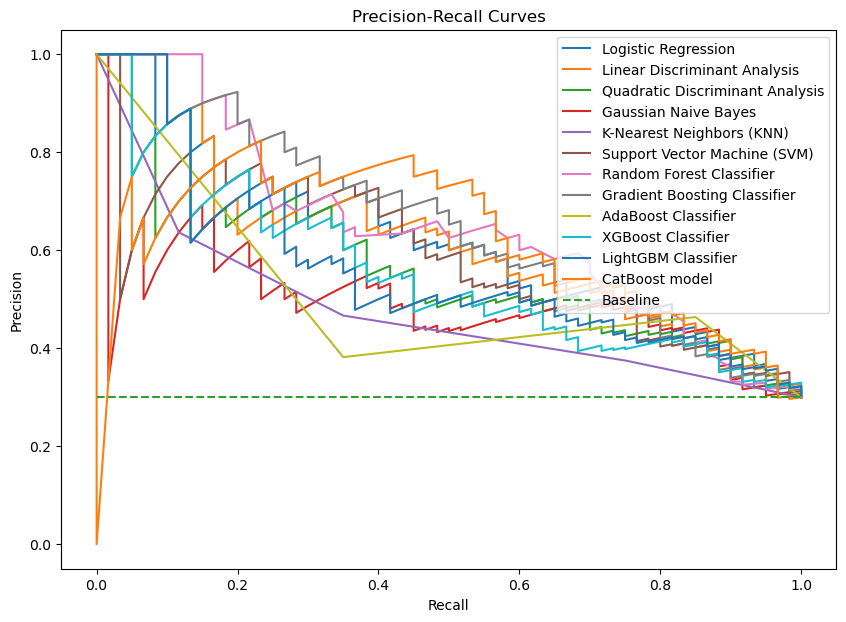

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

auc_pr_df = pd.DataFrame()
# For catboost model, I have assumed that the sampling will result in same index for both data as we use percentage
plt.figure(figsize=(10, 7))
for model_name in models:
    model = models[model_name]
    if hasattr(model, "predict_proba"):
        if model_name == "CatBoost model":
            predicted_probabilities = model.predict_proba(X_test_c)[:, 1]
        else:
            predicted_probabilities = model.predict_proba(X_test_scaled)[:, 1]
    else:
        predicted_probabilities = model.decision_function(X_test_scaled)
        
    precision, recall, _ = precision_recall_curve(y_test, predicted_probabilities)
    
    auc_pr = auc(recall, precision)
    auc_pr_df = auc_pr_df.append({'model': model_name, 'AUC for Precision-Recall curve': auc_pr}, ignore_index=True)
    
    # precision_recall_data[model_name] = {'precision': precision, 'recall': recall}
    plt.plot(recall, precision, label=model_name)
ratio_positives = len(y_test[y_test == 1]) / len(y_test)
ratio_negatives = 1 - ratio_positives
plt.plot([0, 1], [ratio_positives, ratio_positives], linestyle='--', label='Baseline')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper right')
plt.show()


In [82]:
auc_pr_df = auc_pr_df.sort_values(by='AUC for Precision-Recall curve', ascending=False)
print("Area Under the Curve in a Precision-Recall plot:")
auc_pr_df


Area Under the Curve in a Precision-Recall plot:


,model,AUC for Precision-Recall curve
7,Gradient Boosting Classifier,0.652580
6,Random Forest Classifier,0.647243
0,Logistic Regression,0.621939
1,Linear Discriminant Analysis,0.617969
11,CatBoost model,0.609602
5,Support Vector Machine (SVM),0.586573
10,LightGBM Classifier,0.561101
2,Quadratic Discriminant Analysis,0.554625
9,XGBoost Classifier,0.553639
8,AdaBoost Classifier,0.510455


 - The best performing models are Gradient Boosting Classifier, Random Forest Classifier, Logistic Regression, Linear Discriminant Analysis, Catboost having above 0.6 as area.
 - The moderate performing models are Support Vector Machine (SVM), LightGBM Classifier, Quadratic Discriminant Analysis, XGBoost Classifier, AdaBoost Classifier above 0.5 as area. 
 - The least performing models are Gaussian Naive Bayes and K-Nearest Neighbors (KNN) with less than 0.5 as area
 - Among the models, Gradient Boosting Classifier has highest AUC. Hence we can choose the Gradient Boosting Classifier	as the best model. We can also fine tune this model to increase the accuracy by creating lower probability. 

Optimal Threshold that maximizes F1-score: 0.34289299340840734
Optimal Precision: 0.5735294117647058
Optimal Recall: 0.65


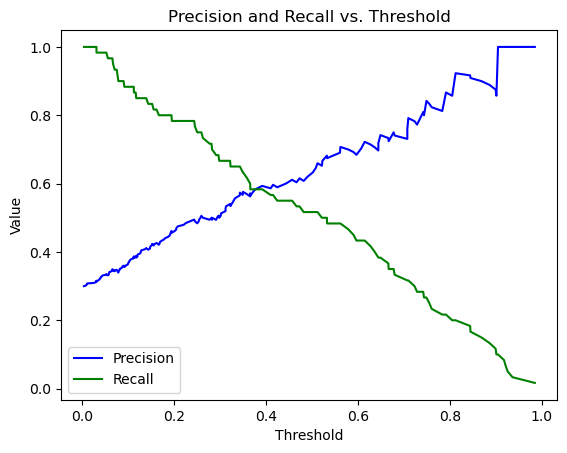

In [42]:
predicted_probabilities = models["Gradient Boosting Classifier"].predict_proba(X_test_scaled)[:, 1]
# Lets find out the threshold for which we have maximum f1_scores
precision, recall, thresholds = precision_recall_curve(y_test, predicted_probabilities)
f1_scores = 2 * (precision * recall) / (precision + recall)
index = np.argmax(f1_scores)
optimal_threshold = thresholds[index]
optimal_precision = precision[index]
optimal_recall = recall[index]
print("Optimal Threshold that maximizes F1-score:", optimal_threshold)
print("Optimal Precision:", optimal_precision)
print("Optimal Recall:", optimal_recall)
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.show()


Threshold that has recall of 0.8: 0.16642564048897437
Precision (recall 0.80): 0.42105263157894735
Recall: 0.8
Gradient Boosting Classifier - Training Set Performance
Training Accuracy: 0.86875
              precision    recall  f1-score   support

           0       1.00      0.81      0.90       560
           1       0.70      1.00      0.82       240

    accuracy                           0.87       800
   macro avg       0.85      0.91      0.86       800
weighted avg       0.91      0.87      0.87       800



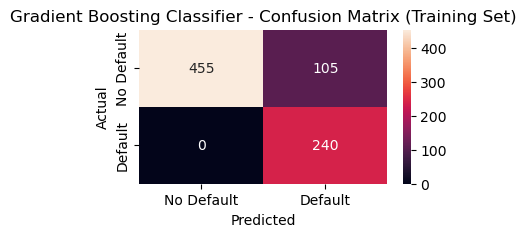

Gradient Boosting Classifier - Test Set Performance
Test Accuracy: 0.615
              precision    recall  f1-score   support

           0       0.86      0.54      0.66       140
           1       0.42      0.80      0.55        60

    accuracy                           0.61       200
   macro avg       0.64      0.67      0.61       200
weighted avg       0.73      0.61      0.63       200



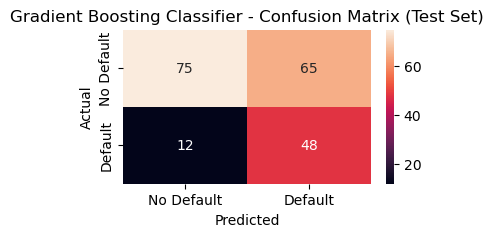

In [43]:
# Looking at above models. most of the models reach 0.7-0.8 recall for class 1. So lets make the final model have around 0.8 recall. 
# Hence 
desired_recall = 0.80
index = np.argmax(np.where(recall <= desired_recall, 1, 0))
optimal_threshold = thresholds[index]
optimal_precision = precision[index]
optimal_recall = recall[index]
print("Threshold that has recall of 0.8:", optimal_threshold)
print("Precision (recall 0.80):", optimal_precision)
print("Recall:", optimal_recall)

def predict_with_threshold(model, optimal_threshold, x):
    y_pred_proba = model.predict_proba(x)[:, 1]
    y_pred = (y_pred_proba > optimal_threshold).astype(int)
    return y_pred
def get_classification_report_manual(X, y, y_pred, model_name, data_label="Training"):
    print(f"{model_name} - {data_label} Set Performance")
    # y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"{data_label} Accuracy: {accuracy}")
    print(classification_report(y, y_pred))
    conf = confusion_matrix(y, y_pred)
    plt.figure(figsize=(4, 2))
    sns.heatmap(conf, annot=True, fmt='d',
                xticklabels=['No Default', 'Default'],
                yticklabels=['No Default', 'Default'])
    plt.title(f'{model_name} - Confusion Matrix ({data_label} Set)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
model_name = "Gradient Boosting Classifier"

y_pred = predict_with_threshold(models[model_name], optimal_threshold, X_train_scaled)
get_classification_report_manual(X_train_scaled, y_train, y_pred, model_name=model_name, data_label="Training")

y_pred = predict_with_threshold(models[model_name], optimal_threshold, X_test_scaled)
get_classification_report_manual(X_test_scaled, y_test, y_pred, model_name=model_name, data_label="Test")


## Coefficients for LDA


In [80]:
lda_coef_df = pd.DataFrame({"columns": X_train.columns, "Coef": lda_model.coef_[0]})
lda_coef_df = lda_coef_df.sort_values(by='Coef', ascending=False)
lda_coef_df


,columns,Coef
8,checking_balance_< 0 DM,0.720084
7,checking_balance_1 - 200 DM,0.497326
16,savings_balance_< 100 DM,0.464626
25,credit_history,0.422466
0,months_loan_duration,0.387638
2,percent_of_income,0.334535
18,other_credit_bank,0.288059
14,savings_balance_100 - 500 DM,0.243491
1,amount,0.236640
21,housing_rent,0.228861


I can see that checking_balance_< 0 DM, checking_balance_1 - 200 DM, savings_balance_< 100 DM, credit_history shows very positive coeffients while savings_balance_> 1000 DM, housing_own, phone, purpose_business, purpose_car, employment_duration, purpose_furniture/appliances shows negative coeffients. This suggests that if Amount of money available in account of customers is less than 200 DM, then there is more chance of default. We can also see that if Balance in account for customers is greater than 1000 DM then there is less chance of default. But note that if the Balance in account for customers is less 100 DM, then it may result in more default. we can also see that credit history also shows high positive coeffients showing the importance of the variable. Among purpose of loan, it seems that loan for business, car, furniture/appliances is less likely to default. we can see years of employment is having very good effect in repaying the loan. Owning a house also seems to make customer repay the loan. I can see there are many factors affecting having an effect on the decision if customer defaults or not. I have only noted the top and bottom few here